In [1]:
import pandas as pd 

In [2]:
# 读取数据
data = pd.read_csv(r'X:\Datasets\Blockchain\xblock.pro\eth-phishing-detection\datasets\etherscan\ex_1\features.csv')
# 重命名columns 1->shapelet1, 2->shapelet2, ...
columns_keys = {str(i): 'shapelet' + str(i) for i in range(10)}
data.rename(columns=columns_keys, inplace=True)

data = data.fillna(0)

data.head()

,address,value_out,value_in,balance,degree,degree_in,degree_out,max_value,min_value,mean_value,...,shapelet1,shapelet2,shapelet3,shapelet4,shapelet5,shapelet6,shapelet7,shapelet8,shapelet9,label
0,0x000000000532b45f47779fce440748893b257865,117.129473,117.132025,-0.002552,23,20,3,39.044000,0.00041,10.185283,...,74089.660198,38354.888309,119710.156052,98043.697733,16639.793390,67682.934904,11993.482352,51710.903250,18295.079406,0
1,0x00000000072d54638c2c2a3da3f715360269eea1,215.965533,215.193910,0.771623,53,30,23,208.090009,0.00000,8.135084,...,74039.472888,38309.992670,119656.832828,98011.896398,16586.992016,67629.675734,11940.940031,51657.948246,18242.221176,0
2,0x0000000009324b6434d7766af41908e4c49ee1d7,164.209043,164.214902,-0.005859,15,9,6,100.000000,0.01000,21.894930,...,74092.400641,38355.490444,119712.403372,98043.221573,16642.048159,67685.184942,11995.742776,51713.381707,18297.373508,0
3,0x0000000086c5d614bec59dfd2c9b88f7cb57f23c,60.502305,50.502914,9.999391,6,5,1,60.502305,5.00000,18.500870,...,74131.734820,38387.115176,119752.447164,98065.653838,16682.067882,67725.228128,12035.746274,51753.433699,18337.455862,0
4,0x00000000bf02300fd6251627aa3db8933a0eee83,101.761014,81.766424,19.994590,24,20,4,41.477000,0.00229,7.646977,...,74121.025755,38381.231654,119741.309078,98061.638459,16670.929980,67714.086331,12024.610916,51741.960025,18326.220083,0


<AxesSubplot: >

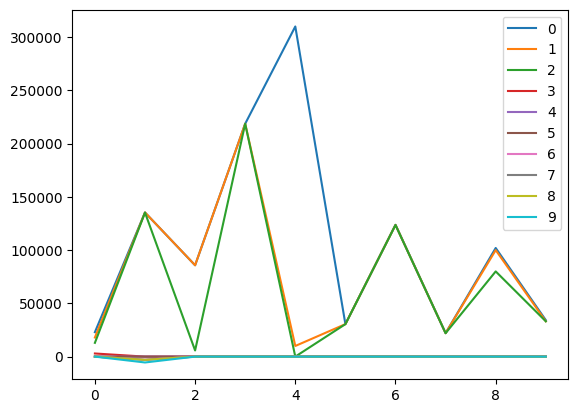

In [3]:
# 获取shaplets_vector
shapelets_vector = pd.read_csv(r'X:\Datasets\Blockchain\xblock.pro\eth-phishing-detection\datasets\etherscan\ex_1\shapelets_vector.csv')

# 提取shapelets_vector中的shapelets

shapelets_vector.plot()

In [4]:
shapelets_vector.head()

,0,1,2,3,4,5,6,7,8,9
0,22940.113412,17940.113412,12940.113412,2940.113412,-0.128089,-0.128089,-0.128089,-0.128089,-0.128089,-0.128089
1,135349.021750,135348.021750,135248.021750,0.021750,-0.978250,-1.978250,-2901.978250,-3000.978250,-3001.978250,-5499.978250
2,85786.280212,85786.280212,5786.280212,0.003160,0.003160,0.003160,0.003160,0.003160,0.003160,0.003160
3,218676.490604,218676.477264,218675.477264,0.003066,0.003066,0.003066,0.003066,0.003066,0.003066,0.003066
4,309999.770303,9998.770303,0.003107,0.003107,0.003107,0.003107,0.003107,0.003107,0.003107,0.003107


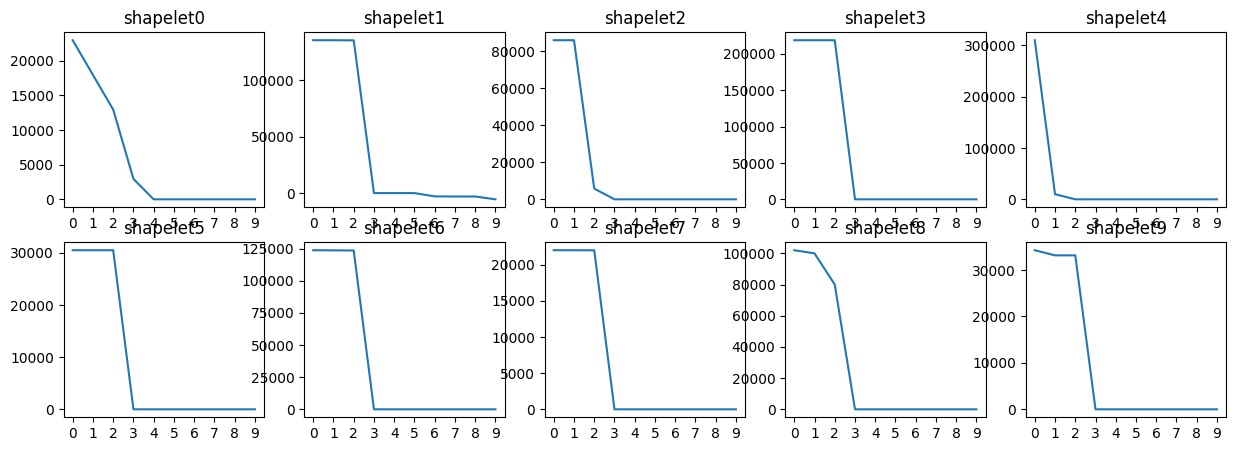

In [5]:
# 画10个子图
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(15, 5))

for i in range(10):
    axs[i//5, i%5].plot(shapelets_vector.iloc[i, :])
    axs[i//5, i%5].set_title('shapelet' + str(i))

plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(data.drop(['label', 'address'], axis=1), data['label'], test_size=0.2, random_state=0)

In [7]:
# 训练模型
import xgboost

model = xgboost.XGBClassifier()

model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9387    0.9336    0.9361       738
           1     0.9016    0.9089    0.9052       494

    accuracy                         0.9237      1232
   macro avg     0.9201    0.9213    0.9207      1232
weighted avg     0.9238    0.9237    0.9238      1232



In [12]:
# 只使用基础特征
base_features = ['balance',	'degree']
graph_features = ['motif1',	'motif1_00', 'motif1_01','motif1_10','motif1_11','motif2','motif3','motif1_ratio','motif2_ratio',	'motif3_ratio',	'motif1_00_ratio',	'motif1_01_ratio',	'motif1_10_ratio',	'motif1_11_ratio']
shapelet_features = ['shapelet' + str(i) for i in range(10)]


In [13]:
# 使用base_features
X_train, X_test, y_train, y_test = train_test_split(data[base_features], data['label'], test_size=0.2, random_state=0)
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8247    0.9051    0.8630       738
           1     0.8341    0.7126    0.7686       494

    accuracy                         0.8279      1232
   macro avg     0.8294    0.8088    0.8158      1232
weighted avg     0.8285    0.8279    0.8252      1232



ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


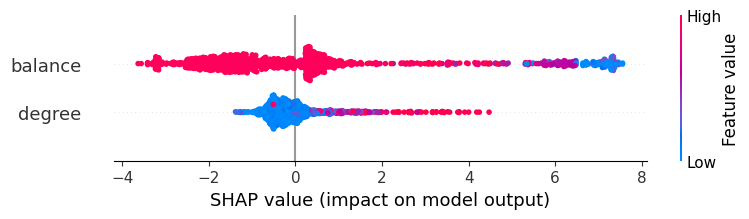

In [14]:
# shap可解释性分析

import shap

shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


In [15]:
# 使用graph_features
X_train, X_test, y_train, y_test = train_test_split(data[graph_features], data['label'], test_size=0.2, random_state=0)
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8088    0.7737    0.7909       738
           1     0.6825    0.7267    0.7039       494

    accuracy                         0.7549      1232
   macro avg     0.7456    0.7502    0.7474      1232
weighted avg     0.7581    0.7549    0.7560      1232



ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


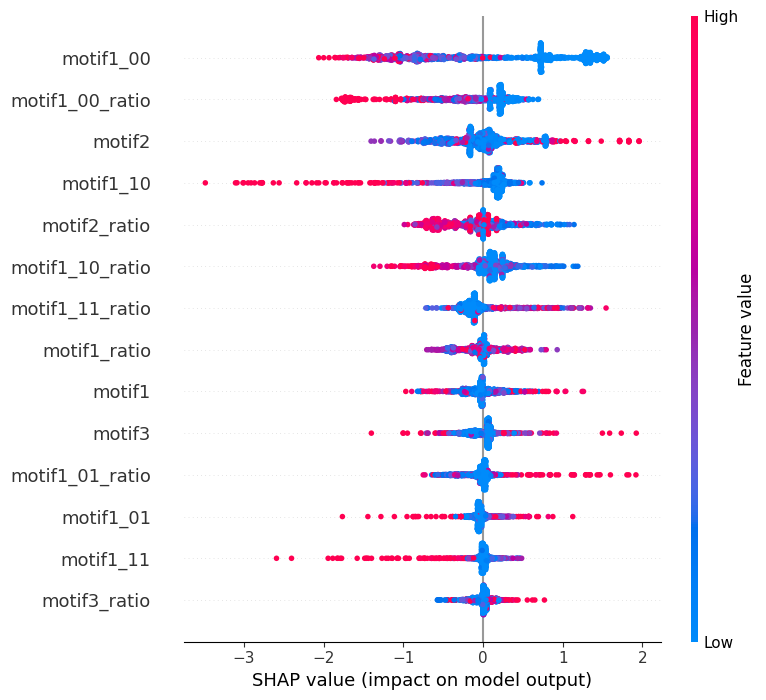

In [16]:
# shap可解释性分析
import shap

shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


In [17]:
# 使用shapelet_features
X_train, X_test, y_train, y_test = train_test_split(data[shapelet_features], data['label'], test_size=0.2, random_state=0)
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8735    0.9173    0.8949       738
           1     0.8665    0.8016    0.8328       494

    accuracy                         0.8709      1232
   macro avg     0.8700    0.8595    0.8639      1232
weighted avg     0.8707    0.8709    0.8700      1232



ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


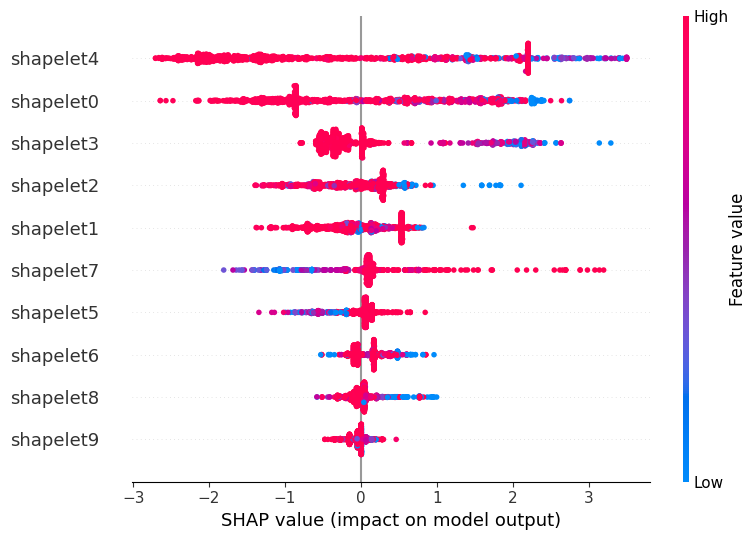

In [18]:
# shap可解释性分析

import shap

shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


In [19]:
# 使用base_features + graph_features + shapelet_features
X_train, X_test, y_train, y_test = train_test_split(data[base_features + graph_features + shapelet_features], data['label'], test_size=0.2, random_state=0)
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9280    0.9255    0.9267       738
           1     0.8891    0.8927    0.8909       494

    accuracy                         0.9123      1232
   macro avg     0.9086    0.9091    0.9088      1232
weighted avg     0.9124    0.9123    0.9124      1232



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


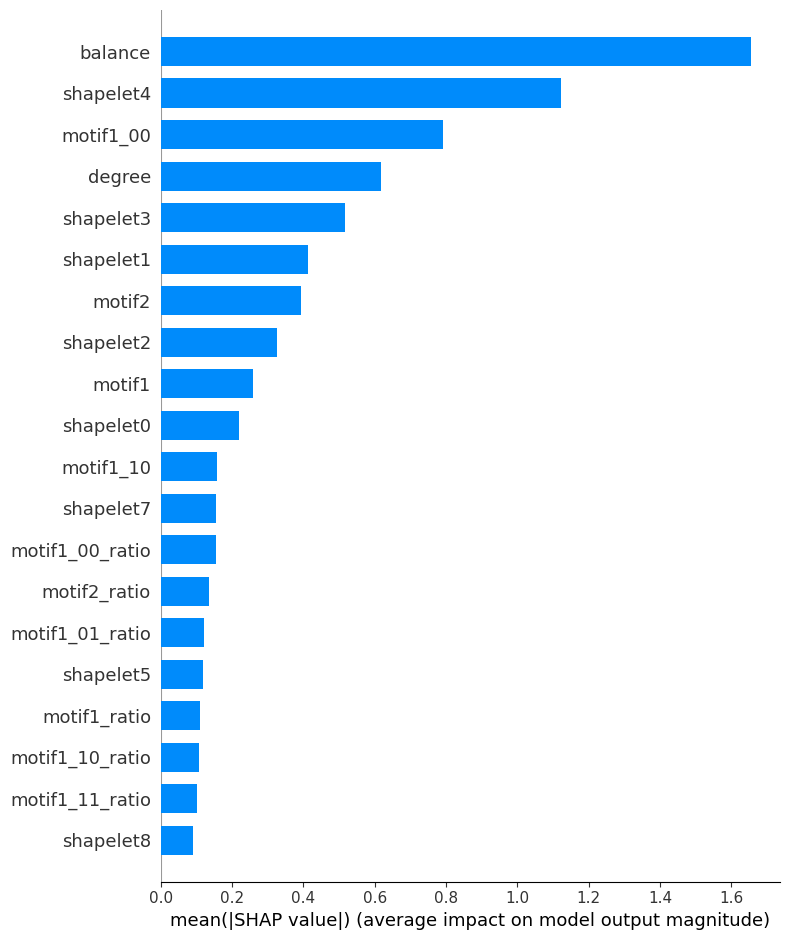

In [20]:
# shap可解释性分析

import shap

shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type='bar')


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


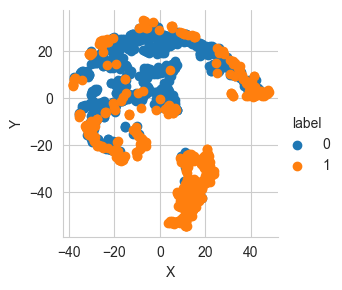

In [21]:
# 画t-SNE图
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

tsne_obj = tsne.fit_transform(X_test)

tsne_df = pd.DataFrame({'X': tsne_obj[:, 0], 'Y': tsne_obj[:, 1], 'label': y_test})

# 画图
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(tsne_df, hue="label").map(plt.scatter, "X", "Y").add_legend()
plt.show()


In [22]:
# 使用shapelet2和motif1_00
X_train, X_test, y_train, y_test = train_test_split(data[['shapelet4', 'motif1_00', 'balance']], data['label'], test_size=0.2, random_state=0)
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9248    0.8835    0.9037       738
           1     0.8368    0.8927    0.8639       494

    accuracy                         0.8872      1232
   macro avg     0.8808    0.8881    0.8838      1232
weighted avg     0.8895    0.8872    0.8877      1232

